# Theory of Finance

In this notebook, you will work with stock market data from the S&P500. You will learn some basics of portfolio management using Python, such as computing log-returns, computing and plotting the mean-variance frontier, and building the minimum variance portfolio.

In [1]:
# Library to access Yahoo!Finance data through Python
import pandas_datareader.data as pdata
# Numerical computation library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt

## Obtaining financial data

The first thing we are going to do is gather stock prices from the `pandas-datareader` package we have just loaded above. In general, there exist a lot of different sources for financial data, depending on your requirements (which markets, which frequency, which time window, etc.) you might need to look into further sources. For simplicity's sake, this notebook will ignore these complications but these are things you should connsider when writing your research.


We begin by building a list of 30 *random* tickers from stocks in the S&P500. We will grab the data from pandas-datareader for these stocks only.


In [58]:
# Create a list with the tickers of the stocks for which we want to obtain data
stocklist = ['AAPL', 'AFL', 'AMZN', 'APD', 'BAC', 'COF', 'COST', 
             'HBAN', 'HON', 'INTU', 'IPG', 'KEY', 'KLAC', 'LMT', 
             'LOW', 'MSFT', 'NEM', 'NKE', 'OMC', 'PAYX', 'RF', 'RHI', 
             'SNA', 'SWK', 'UPS', 'USB', 'VZ', 'WHR', 'WY', 'YUM']

Because we are querying an online API, obtaining the data can take a few seconds.

In [60]:
# Obtain the data from Yahoo!Finance between 1st Jan 2010 and 1st Jun 2021
prices = pdata.DataReader(stocklist, data_source = 'yahoo', 
                          start = '2010-1-1', end = '2021-6-1')
# Keep only the "Adjusted Close" prices
prices = prices["Adj Close"]
# Display the first 10 rows of the dataset
prices.head(10)

Symbols,AAPL,AFL,AMZN,APD,BAC,COF,COST,HBAN,HON,INTU,IPG,KEY,KLAC,LMT,LOW,MSFT,NEM,NKE,OMC,PAYX,RF,RHI,SNA,SWK,UPS,USB,VZ,WHR,WY,YUM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.572422,17.895367,133.899994,57.910793,13.663458,33.304298,44.377483,2.683301,29.792852,27.975185,5.521321,4.456471,21.911167,52.905529,18.835480,23.994564,39.685360,14.188535,28.790981,20.600105,4.279910,21.682940,33.757488,41.461426,41.304382,17.339727,18.162601,61.004475,11.442489,20.147516
2010-01-05,6.583784,18.414516,134.690002,57.430294,14.107587,34.617718,44.243023,2.741634,29.851923,27.975185,5.462661,4.629030,21.667845,53.456272,18.640289,24.002319,39.791847,14.244983,28.689241,20.586742,4.422047,21.954771,33.741722,42.067108,41.375370,17.779282,18.195339,60.877930,11.685399,20.078611
2010-01-06,6.479061,18.576283,132.250000,56.956760,14.273045,34.805344,44.818195,2.814550,29.851923,27.584742,5.462661,4.599019,21.584753,52.671471,18.689087,23.855013,40.635517,14.158135,28.463968,20.753841,4.477323,22.962173,33.930756,43.121155,41.070084,17.968744,17.672155,60.341930,11.556192,19.935076
2010-01-07,6.467082,18.775660,130.000000,56.629456,14.743298,36.528122,44.601562,3.128087,30.427849,27.493948,5.323347,4.794081,21.703453,51.225750,19.225851,23.606922,40.373413,14.297089,28.296837,21.081358,4.872147,23.369921,34.497845,44.639275,40.757717,18.317364,17.566957,61.637203,11.504510,19.929331
2010-01-08,6.510078,18.587557,133.520004,56.991570,14.612673,36.212566,44.280376,3.077046,31.099754,28.220333,5.330678,4.876611,22.029867,52.051884,19.185190,23.769743,40.643711,14.268866,28.623837,21.094721,4.880045,23.353939,35.214588,45.166302,42.717152,18.347677,17.578037,62.947361,11.398561,19.935076
2010-01-11,6.452650,19.076611,130.309998,58.036110,14.743298,35.564388,44.332653,3.157254,31.491085,28.347450,5.477326,4.899117,21.934908,52.299717,19.022530,23.467388,41.102402,14.093002,28.623837,21.221722,4.990597,23.465864,35.364254,44.890987,44.598507,18.431044,17.650005,62.545399,11.473502,20.279568
2010-01-12,6.379251,18.978806,127.349998,57.297997,14.246922,35.700851,44.093632,3.069755,31.136667,28.347450,5.345344,4.809085,21.169331,52.292828,18.973742,23.312330,39.742699,14.073461,28.144241,21.148191,4.935320,22.634363,34.623859,44.190914,44.300327,18.423464,17.666611,61.302231,11.339126,20.664259
2010-01-13,6.469232,19.185703,129.110001,57.868999,14.473339,35.922592,44.370014,3.142671,31.247433,28.674337,5.411335,4.869108,21.418579,52.926178,18.884279,23.529409,39.931099,14.199389,28.456705,21.161560,5.022183,22.722315,34.844406,44.607811,44.066055,18.726604,17.644470,61.838215,11.442489,20.727800
2010-01-14,6.431766,19.437744,127.349998,57.151730,14.647509,35.538795,43.862068,3.215587,31.432013,28.855934,5.294016,5.139198,20.771688,52.898624,18.859879,24.002319,39.660782,14.110369,27.693687,20.954363,5.172215,23.042120,34.734135,44.481953,44.158329,19.196478,17.284605,61.912643,11.333957,20.953035


In [61]:
# Create a dataframe of percentage returns
returns = 100 * prices.pct_change()
# Display the first 10 rows
returns.head(10)

Symbols,AAPL,AFL,AMZN,APD,BAC,COF,COST,HBAN,HON,INTU,IPG,KEY,KLAC,LMT,LOW,MSFT,NEM,NKE,OMC,PAYX,RF,RHI,SNA,SWK,UPS,USB,VZ,WHR,WY,YUM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.172875,2.901029,0.589999,-0.829723,3.250488,3.943693,-0.302993,2.173906,0.198271,0.000000,-1.062427,3.872095,-1.110495,1.040993,-1.036291,0.032321,0.268329,0.397842,-0.353374,-0.064868,3.321029,1.253665,-0.046704,1.460833,0.171865,2.534955,0.180248,-0.207436,2.122881,-0.342002
2010-01-06,-1.590627,0.878470,-1.811569,-0.824536,1.172828,0.541994,1.300030,2.659592,0.000000,-1.395679,0.000000,-0.648325,-0.383479,-1.468119,0.261786,-0.613718,2.120208,-0.609669,-0.785218,0.811683,1.250007,4.588535,0.560237,2.505631,-0.737846,1.065637,-2.875373,-0.880449,-1.105710,-0.714868
2010-01-07,-0.184882,1.073288,-1.701323,-0.574655,3.294693,4.949752,-0.483359,11.139850,1.929275,-0.329144,-2.550307,4.241397,0.549925,-2.744789,2.872073,-1.039994,-0.645012,0.981437,-0.587168,1.578101,8.818306,1.775735,1.671313,3.520592,-0.760569,1.940144,-0.595275,2.146555,-0.447228,-0.028818
2010-01-08,0.664843,-1.001843,2.707696,0.639445,-0.885994,-0.863870,-0.720123,-1.631674,2.208193,2.641982,0.137730,1.721488,1.503973,1.612731,-0.211491,0.689716,0.669495,-0.197404,1.155605,0.063387,0.162102,-0.068386,2.077647,1.180636,4.807518,0.165490,0.063072,2.125596,-0.920930,0.028827
2010-01-11,-0.882138,2.631081,-2.404139,1.832798,0.893914,-1.789926,0.118058,2.606634,1.258308,0.450445,2.751018,0.461504,-0.431048,0.476127,-0.847845,-1.272015,1.128565,-1.232496,0.000000,0.602050,2.265386,0.479256,0.425011,-0.609557,4.404215,0.454370,0.409420,-0.638569,0.657457,1.728069
2010-01-12,-1.137495,-0.512696,-2.271506,-1.271818,-3.366785,0.383707,-0.539154,-2.771369,-1.125454,0.000000,-2.409621,-1.837702,-3.490224,-0.013173,-0.256475,-0.660738,-3.308087,-0.138663,-1.675510,-0.346486,-1.107611,-3.543449,-2.093624,-1.559496,-0.668587,-0.041125,0.094081,-1.987625,-1.171190,1.896940
2010-01-13,1.410520,1.090152,1.382020,0.996550,1.589232,0.621108,0.626808,2.375305,0.355740,1.153145,1.234559,1.248103,1.177404,1.211161,-0.471506,0.931177,0.474050,0.894797,1.110223,0.063214,1.760019,0.388576,0.636979,0.943399,-0.528827,1.645405,-0.125324,0.874330,0.911561,0.307494
2010-01-14,-0.579150,1.313691,-1.363180,-1.239472,1.203382,-1.068399,-1.144796,2.320193,0.590704,0.633308,-2.168025,5.547014,-3.020231,-0.052060,-0.129212,2.009867,-0.676959,-0.626933,-2.681328,-0.979121,2.987397,1.407450,-0.316468,-0.282144,0.209399,2.509122,-2.039535,0.120360,-0.948500,1.086632


Now that we have obtained stock returns for our 30 stocks between 2010 and 2021, we further proceed by splitting the data into train and test sets. In general, a train set is a set you use to fit your model and the test set is used to validate your model. This can help us understand when a model is overfitting. An overfitted model will perform well on the train data (the data that was used to fit the model) and it will perform badly on the test set (data that the model has not "*seen*" yet).

In [62]:
# Separate the data into a training (pre-2020) and a testing set (post-2019)
train_index = returns.index < "2020-1-1"
test_index = returns.index >= "2020-1-1"
returns[train_index]

Symbols,AAPL,AFL,AMZN,APD,BAC,COF,COST,HBAN,HON,INTU,IPG,KEY,KLAC,LMT,LOW,MSFT,NEM,NKE,OMC,PAYX,RF,RHI,SNA,SWK,UPS,USB,VZ,WHR,WY,YUM
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.172875,2.901029,0.589999,-0.829723,3.250488,3.943693,-0.302993,2.173906,0.198271,0.000000,-1.062427,3.872095,-1.110495,1.040993,-1.036291,0.032321,0.268329,0.397842,-0.353374,-0.064868,3.321029,1.253665,-0.046704,1.460833,0.171865,2.534955,0.180248,-0.207436,2.122881,-0.342002
2010-01-06,-1.590627,0.878470,-1.811569,-0.824536,1.172828,0.541994,1.300030,2.659592,0.000000,-1.395679,0.000000,-0.648325,-0.383479,-1.468119,0.261786,-0.613718,2.120208,-0.609669,-0.785218,0.811683,1.250007,4.588535,0.560237,2.505631,-0.737846,1.065637,-2.875373,-0.880449,-1.105710,-0.714868
2010-01-07,-0.184882,1.073288,-1.701323,-0.574655,3.294693,4.949752,-0.483359,11.139850,1.929275,-0.329144,-2.550307,4.241397,0.549925,-2.744789,2.872073,-1.039994,-0.645012,0.981437,-0.587168,1.578101,8.818306,1.775735,1.671313,3.520592,-0.760569,1.940144,-0.595275,2.146555,-0.447228,-0.028818
2010-01-08,0.664843,-1.001843,2.707696,0.639445,-0.885994,-0.863870,-0.720123,-1.631674,2.208193,2.641982,0.137730,1.721488,1.503973,1.612731,-0.211491,0.689716,0.669495,-0.197404,1.155605,0.063387,0.162102,-0.068386,2.077647,1.180636,4.807518,0.165490,0.063072,2.125596,-0.920930,0.028827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,0.095052,0.418729,-0.211380,-0.038276,0.142180,0.019420,0.313671,0.198408,-0.068017,-0.732310,-0.043424,0.493816,0.564632,-0.441450,0.150513,-0.019083,0.981556,0.099967,0.161079,-0.306204,0.174736,0.096559,-0.529977,-0.953915,-0.512861,0.151058,-0.195450,-0.206220,-0.962177,0.521001
2019-12-26,1.984045,-0.265349,4.446659,0.438192,0.851782,0.514824,0.509804,0.198015,0.323299,0.960917,0.521291,0.098282,0.359322,0.545922,-0.033394,0.819675,1.209108,0.569188,0.074212,0.070878,0.348828,0.498384,0.509132,0.345262,0.600012,0.804416,0.016335,0.006900,0.469007,1.455195
2019-12-27,-0.037962,0.000000,0.055118,-0.249908,-0.478614,-0.463865,-0.547807,-0.395247,-0.226141,0.071205,-0.345725,-0.441814,-0.128666,0.331378,0.417613,0.182771,0.046845,0.853946,-0.074157,0.484005,-0.579378,-0.111971,-0.341630,0.144865,-0.084003,-0.698255,0.391569,0.502788,-0.033342,0.108067


In [63]:
# Using the training set, compute the stock returns means,
mean_returns = returns[train_index].mean()
# ... standard deviations,
std_returns  = returns[train_index].std()
# ... and covariances
cov_returns = returns[train_index].cov()

## Computing the efficient frontier

The efficient frontier (also mean-variance or portfolio frontier) is a set of portfolio allocations which offer the lowest variance for a given level of return.

Finding the efficient frontier is done by solving the optimization problem

$$
\begin{align}
\min &\mathbb{V}[R_p] \\ \text{s.t.} \ &\mathbb{E}[R_p] = \mu^\star
\end{align}
$$
where $\mathbb{V}[R_p]$ represents the variance of the portfolio and $\mathbb{E}[R_p]$ its expected value. Additionally, it is imperative that the chosen portfolio sum to 1.

The efficient frontier can be obtained through numerical minimization or by linear algebra, we follow the latter approach, as given in https://github.com/PaulSoderlind/FinancialTheoryMSc/blob/master/Ch03_MeanVariance.ipynb (however, the linked notebook implements the approach in Julia, here it is of course done in Python)

In [64]:
# Compute the efficient frontier
I = np.ones(mean_returns.shape)   # Vector of ones
S_1 = np.linalg.inv(cov_returns)  # Inverse of the return covariance matrix
# Compute scalars to help us with the computation of the frontier 
# (see course slides, chapter 3.1.4)
A = np.transpose(mean_returns) @ S_1 @ mean_returns
B = np.transpose(mean_returns) @ S_1 @ I
C = np.transpose(I) @ S_1 @ I
# Create a function that returns the weights that minimize the variance for a 
# given level of returns mu_star
def mv_frontier(mu_star):
  lam = (C * mu_star - B) / (A * C - B**2)
  delta = (A - B * mu_star) / (A * C - B**2)
  w = S_1 @ (mean_returns * lam + I * delta)
  return np.sqrt(np.transpose(w) @ cov_returns @ w), w

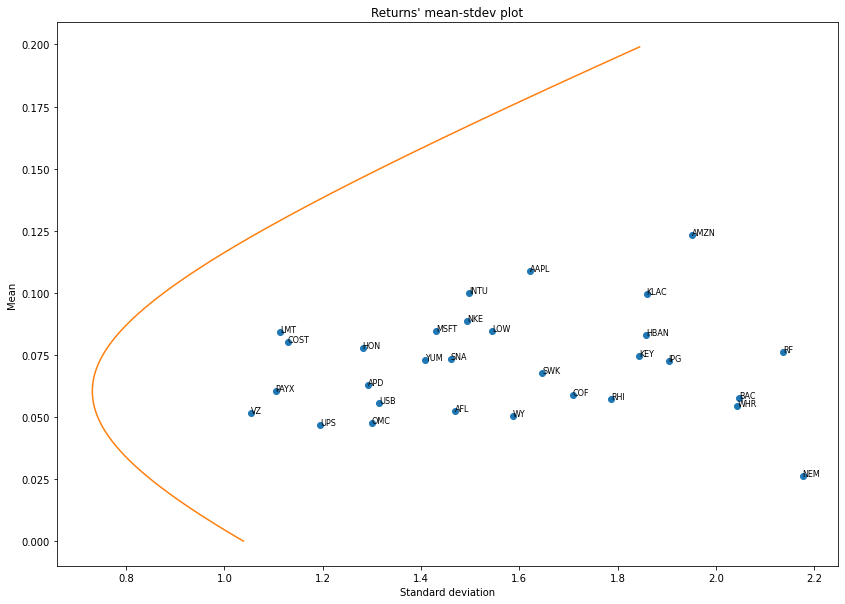

In [65]:
# Create a mean-variance diagram for stock returns
fig, ax = plt.subplots(figsize = (14, 10))
# Plot a scatterplot of returns' mean/stdev points for each stock
ax.plot(std_returns, mean_returns, 'o')
# Plot the mean-variance frontier
mu_star = np.arange(0, 0.2, step = 0.001)
ax.plot(np.vectorize(lambda x: mv_frontier(x)[0])(mu_star), mu_star)
# Add ticker annotations
for tic in mean_returns.index:
  ax.annotate(tic, xy = (std_returns[tic], mean_returns[tic]), size = 8)
ax.set_xlabel("Standard deviation")        # Set x-axis label
ax.set_ylabel("Mean")                      # Set y-axis label
ax.set_title("Returns' mean-stdev plot")   # Set title of the plot
plt.show()                                 # Display the plot

## Comparing portfolios

We now compute the weights that produce the minimum variance portfolio on the train set. Using the equal weights portfolio as a benchmark, we compare the performance of both portfolios on the test set.

In [47]:
# Compute the min-variance portfolio weights
w_minvar = (S_1 @ I) / (np.transpose(I) @ S_1 @ I)
# Store uniform weights for a benchmark portfolio
w_uniform = np.ones(prices.shape[1]) / prices.shape[1]

In [48]:
# Create a function to return an array of portfolio value over time
def portfolio_value(prices, weights):
  # Compute the logarithmic returns
  log_returns = np.log(prices) - np.log(prices.shift(1))
  # Multiply the log returns by the associated weights, take the cumulative sum
  # and exponentiate to transform back to percentage returns
  return np.exp(np.cumsum(np.sum(weights * log_returns, axis = 1)))

In [93]:
# Compute the returns for both portfolios for the train and test set
r_minvar_train = portfolio_value(prices[train_index], w_minvar)
r_uniform_train = portfolio_value(prices[train_index], w_uniform)
r_minvar_test = portfolio_value(prices[test_index], w_minvar)
r_uniform_test = portfolio_value(prices[test_index], w_uniform)

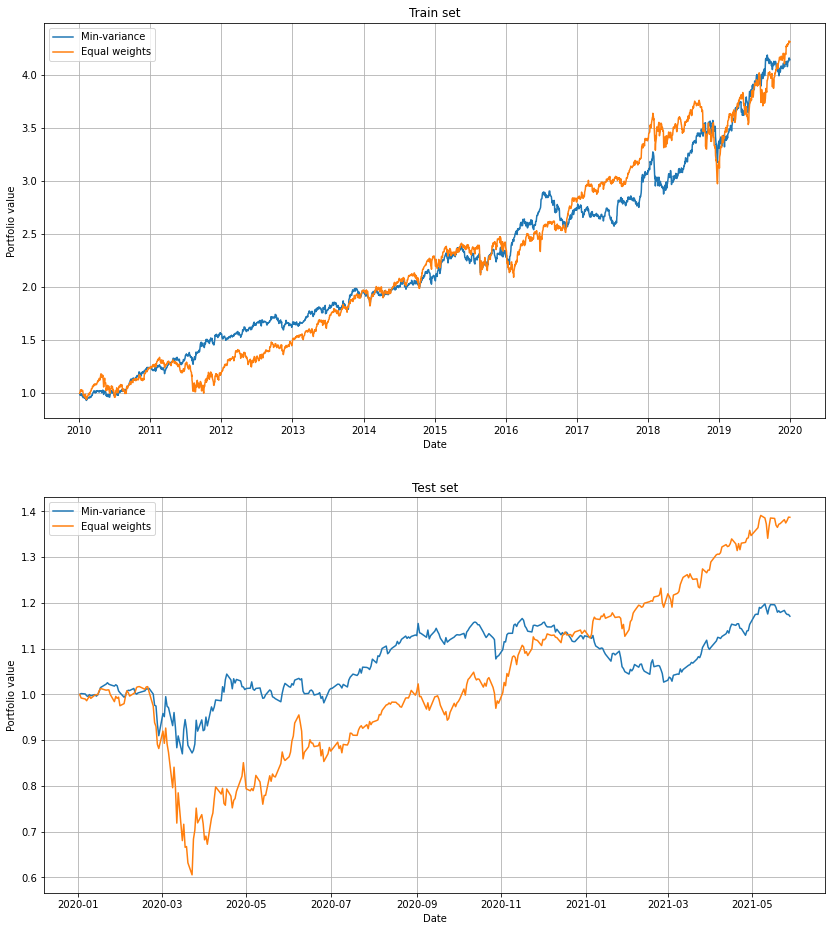

In [94]:
# Create a plot of portfolio value over time
fig, ax = plt.subplots(2, figsize = (14, 16))
# Create the plot for the train set
ax[0].plot(r_minvar_train, label='Min-variance')
ax[0].plot(r_uniform_train, label='Equal weights')
ax[0].set_xlabel("Date")            # Set x-axis label
ax[0].set_ylabel("Portfolio value") # Set y-axis label
ax[0].set_title("Train set")        # Set title of the plot
ax[0].grid()                        # Add a grid
ax[0].legend(loc='best')            # Add the legend
# Create the plot for the test set
ax[1].plot(r_minvar_test, label='Min-variance')
ax[1].plot(r_uniform_test, label='Equal weights')
ax[1].set_xlabel("Date")            # Set x-axis label
ax[1].set_ylabel("Portfolio value") # Set y-axis label
ax[1].set_title("Test set")         # Set title of the plot
ax[1].grid()                        # Add a grid
ax[1].legend(loc='best')            # Add the legend
plt.show()                          # Display the plot

We see that, for both the train and test data, the equally weighted portfolio outperforms the minimum-variance portfolio returns-wise, however, it is also quite obvious that its variance is much higher.

To get a better grasp of these differences, we compute the mean, standard deviation, and Sharpe ratio of both portfolios for both the train and test period.

Because computing means of percentage returns does not make sense, we will instead work with log-returns for the portfolio metrics.

In [105]:
# Create a function to output portfolio metrics
def portfolio_metrics(prices, weights):
  # Compute the logarithmic returns
  log_returns = np.log(prices) - np.log(prices.shift(1))
  # Compute the log-returns for the portfolio
  log_returns = np.sum(weights * log_returns, axis = 1)
  # Compute and display the portfolio metrics
  mu = np.mean(log_returns)
  sigma = np.std(log_returns)
  print("Mean:    ", round(mu, 5))
  print("St. dev.:", round(sigma, 5))
  print("Sharpe:  ", round(mu/sigma, 5))

In [106]:
print("Min. variance portfolio (train data)")
print("-----------------------------------------")
portfolio_metrics(prices[train_index], w_minvar)
print("") # Empty line
print("Equally weighted portfolio (train data)")
print("-----------------------------------------")
portfolio_metrics(prices[train_index], w_uniform)

Min. variance portfolio (train data)
-----------------------------------------
Mean:     0.00057
St. dev.: 0.00757
Sharpe:   0.07461

Equally weighted portfolio (train data)
-----------------------------------------
Mean:     0.00058
St. dev.: 0.01045
Sharpe:   0.05559


In [107]:
print("Min. variance portfolio (test data)")
print("-----------------------------------------")
portfolio_metrics(prices[test_index], w_minvar)
print("") # Empty line
print("Equally weighted portfolio (test data)")
print("-----------------------------------------")
portfolio_metrics(prices[test_index], w_uniform)

Min. variance portfolio (test data)
-----------------------------------------
Mean:     0.00044
St. dev.: 0.01252
Sharpe:   0.03552

Equally weighted portfolio (test data)
-----------------------------------------
Mean:     0.00092
St. dev.: 0.0223
Sharpe:   0.04135
